## Data Understanding

Data yang digunakan pada proyek kali ini adalah data yang diambil dari <a href='https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data'>Kaggle</a>. Trainning file untuk dataset CHURN berisi kumpulan 440882 record pelanggan beserta fitur dan label churn mereka masing-masing. File ini berfungsi sebagai sumber utama untuk melatih model machine learning untuk memprediksi churn pelanggan. Setiap record dalam file training mewakili pelanggan dan mencakup fitur seperti CustomerID,	Age	Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, dan	Last Interaction. Label churn menunjukkan apakah pelanggan telah churn (1) atau tidak (0). Dengan memanfaatkan file pelatihan ini, bisnis dapat mengembangkan model prediksi churn yang akurat untuk mengidentifikasi pelanggan yang paling mungkin untuk churn dan mengambil tindakan proaktif untuk mempertahankannya.

### Data Loading

Import library yang dibutuhkan dan load dataset yang akan digunakan.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Kemudian mengimport data dengan pandas lalu menampilkan data untuk melihat struktur data dan tipe data yang ada.

In [2]:
df_churn = pd.read_csv('data\customer_churn_dataset-training-master.csv')
df_churn = pd.concat([df_churn, pd.read_csv('data\customer_churn_dataset-testing-master.csv')], ignore_index=True)
df_churn

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505204,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505205,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


Dari output code di atas memberikan informasi sebagai berikut:
- Data terdiri dari 505207 baris dan 12 kolom
- Terdapat 11 kolom fitur yaitu `CustomerID`, `Age`, `Gender`, `Tenure`, `Usage Frequency`, `Support Calls`, `Payment Delay`, `Subscription Type`, `Contract Length`, `Total Spend`, dan `Last Interaction`.
- Terdapat 1 kolom target yaitu `Churn`

## Exploratory Data Analysis

### Mengecek Tipe Data Variabel

Pada tahap ini, akan dicek tipe data dari masing-masing variabel yang ada pada dataset. Hal ini penting untuk mengetahui apakah tipe data dari masing-masing variabel sudah sesuai dengan yang diharapkan.

In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


Dari output code di atas, terdapat 2 variabel yang bertipe data tidak sesuai, yaitu `Churn` dan `CustomerID`. Variabel `Churn` seharusnya bertipe data boolean atau dapat juga integer karena true/false akan diwakilkan oleh 1/0, sedangkan variabel `CustomerID` sedangkan variabel `CustomerID` seharusnya bertipe data string. Akan tetapi, variabel `CustomerID` tidak akan digunakan dalam proses analisis data, sehingga tidak perlu diubah tipe datanya.

### Mengecek Missing Value

Selanjutnya, akan dilakukan pengecekan terhadap missing value pada dataset. Hal ini penting untuk mengetahui apakah terdapat missing value pada dataset.

In [4]:
df_churn.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

Dari output code di atas terdapat 1 missing value pada setiap column

### Mengecek Duplikasi Data

Lalu akan dilakukan pengecekan terhadap duplikasi data pada dataset. Hal ini karena adanya duplikasi data dapat mempengaruhi hasil analisis dan model yang akan dibangun.

In [5]:
df_churn.duplicated().sum()

0

Dari output code di atas, terdapat 0 duplikasi data pada dataset.

### Mengecek Statistik Data

Selanjutnya, akan dilakukan pengecekan terhadap statistik data pada dataset. Hal ini penting untuk mengetahui distribusi data dari masing-masing variabel.

In [6]:
df_churn.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Dari output code di atas, dari min, max, median, dan mean terlihat tidak terdapat outlier pada dataset.


### Menangani Missing Value

In [7]:
df_churn.dropna(inplace=True)
df_churn.reset_index(drop=True, inplace=True)

Pada tahap ini, akan dilakukan penanganan terhadap missing value pada dataset. Terdapat 1 missing value pada setiap column, akan dilakukan drop pada missing value tersebut sekaligus melakukan reset indeks.

### Memperbaiki Tipe Data

In [8]:
df_churn['Churn'] = df_churn['Churn'].astype('int')
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505206 entries, 0 to 505205
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  int32  
dtypes: float64(8), int32(1), object(3)
memory usage: 44.3+ MB


### Univariate Analysis

Pada tahap ini, akan dilakukan analisis univariate terhadap masing-masing variabel pada dataset. Hal ini penting untuk mengetahui distribusi data dari masing-masing variabel.

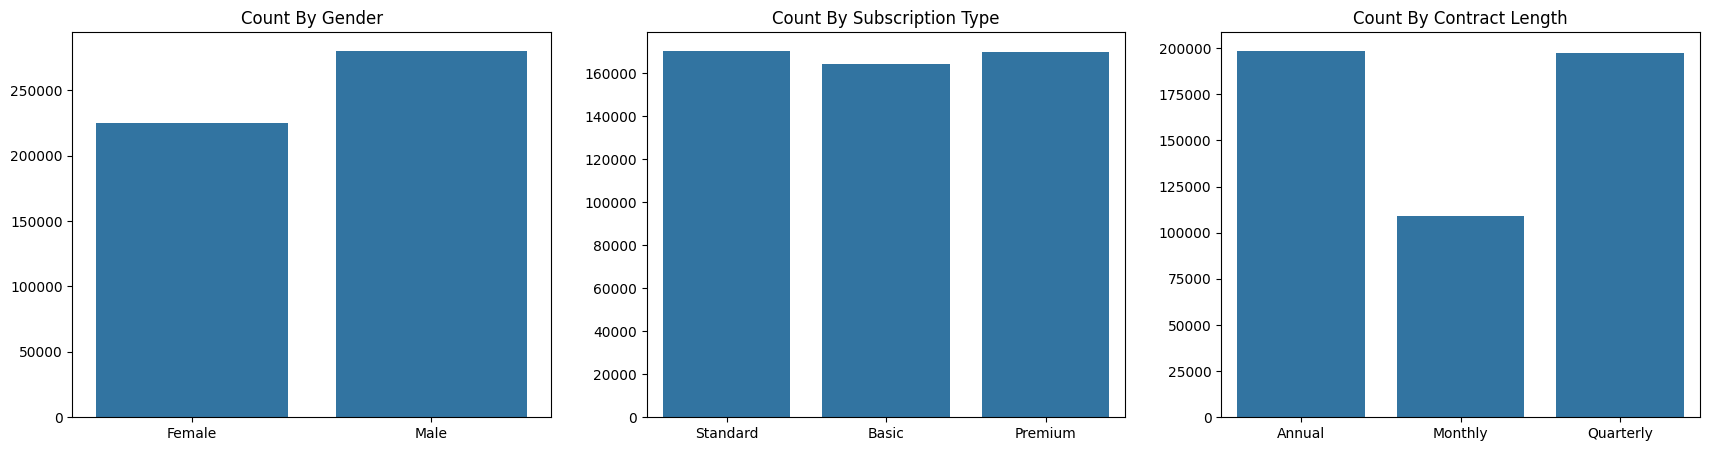

In [9]:
category_columns = df_churn.select_dtypes(include='object').columns
fig, ax = plt.subplots(1, 3, figsize=(21, 5))
for column in category_columns:
    sns.countplot(x=column, data=df_churn, ax=ax[category_columns.get_loc(column)])
    ax[category_columns.get_loc(column)].set_title("Count By " + column)
    ax[category_columns.get_loc(column)].set_xlabel(None)
    ax[category_columns.get_loc(column)].set_ylabel(None)
plt.show()

Dari output code di atas, terlihat distribusi data dari masing-masing variabel pada dataset. Pada countplot dari variabel `Gender`, terlihat bahwa jumlah pelanggan laki-laki lebih banyak dibandingkan dengan pelanggan perempuan. Pada countplot dari variabel `Subscription Type`, terlihat bahwa sebaran pelanggan relatif merata pada masing-masing tipe subscription. Pada countplot dari variabel `Contract Length`, terlihat bahwa pelanggan lebih banyak yang memiliki kontrak tahunan dan triwulanan dibandingkan dengan kontrak bulanan.

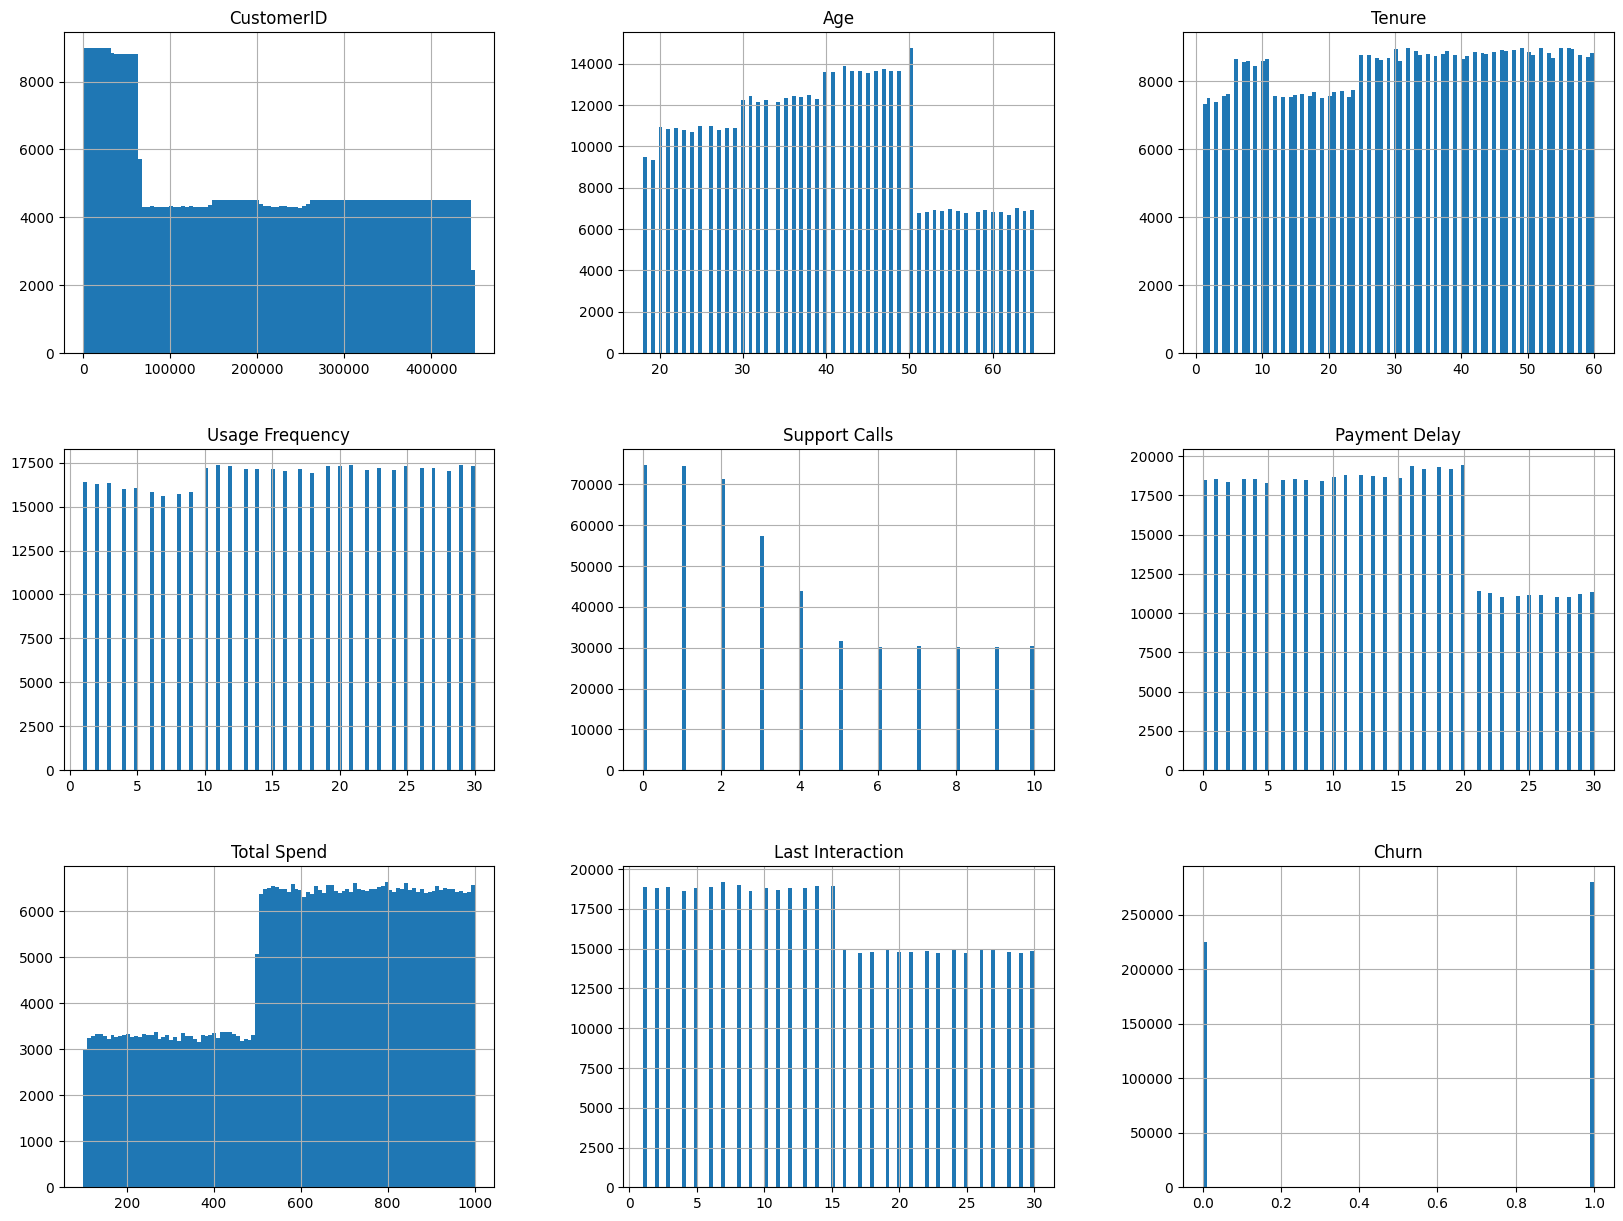

In [10]:
df_churn.hist(bins=100,figsize=(20,15))
plt.show()

## Korelasi Fitur

Pada tahap ini, akan dilakukan pengecekan korelasi antar fitur pada dataset. Hal ini penting untuk mengetahui hubungan antara setiap fitur dengan fitur churn. Sehingga dapat diketahui fitur mana yang memiliki korelasi tinggi dengan fitur churn dan akan digunakan sebagai fitur untuk membangun model.

<Axes: >

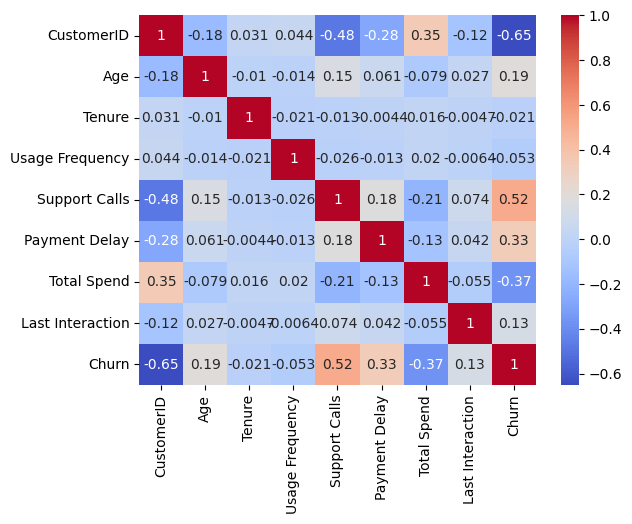

In [182]:
sns.heatmap(data=df_churn.select_dtypes(include=[np.number]).corr(),annot=True, cmap='coolwarm')

Dari heatmap di atas, bahwa fitur yang memiliki korelasi rendah dengan fitur churn adalah Tenure, Usage Frequency, dan Last Interaction.

## Data Preparation

### Menghapus Fitur yang Tidak Diperlukan

Pada tahap ini, akan dilakukan penghapusan kolom yang tidak diperlukan

In [183]:
df_churn.drop(columns=['CustomerID'],inplace=True)

### Encoding Categorical Data

Selanjutnya, akan dilakukan encoding terhadap data kategorikal pada dataset. Hal ini penting karena model machine learning hanya dapat memproses data numerik. Fitur-fitur dataset tersebut yaitu gender, subscription type, dan contract length akan diubah menjadi data numerik.

In [184]:
encoder = LabelEncoder()
df_churn['Gender'] = encoder.fit_transform(df_churn['Gender'])
df_churn.head(5)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1
1,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1
2,55.0,0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1
3,58.0,1,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1
4,23.0,1,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1


Dari output code di atas, fitur gender female diubah menjadi 0 dan fitur gender male diubah menjadi 1.

In [185]:
encoder = OneHotEncoder(sparse_output=False)
columns_to_encode = ['Subscription Type','Contract Length']
encoded_df = pd.DataFrame(encoder.fit_transform(df_churn[columns_to_encode]), columns=encoder.get_feature_names_out(columns_to_encode)).astype(int)
df_churn.drop(columns_to_encode, axis=1, inplace=True)
df_churn = pd.concat([df_churn, encoded_df], axis=1)
df_churn

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,0,39.0,14.0,5.0,18.0,932.0,17.0,1,0,0,1,1,0,0
1,65.0,0,49.0,1.0,10.0,8.0,557.0,6.0,1,1,0,0,0,1,0
2,55.0,0,14.0,4.0,6.0,18.0,185.0,3.0,1,1,0,0,0,0,1
3,58.0,1,38.0,21.0,7.0,7.0,396.0,29.0,1,0,0,1,0,1,0
4,23.0,1,32.0,20.0,5.0,8.0,617.0,20.0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505201,45.0,0,33.0,12.0,6.0,21.0,947.0,14.0,1,1,0,0,0,0,1
505202,37.0,1,6.0,1.0,5.0,22.0,923.0,9.0,1,0,0,1,1,0,0
505203,25.0,1,39.0,14.0,8.0,30.0,327.0,20.0,1,0,1,0,0,1,0
505204,50.0,0,18.0,19.0,7.0,22.0,540.0,13.0,1,0,0,1,0,1,0


Dari output code di atas fitur subscription dan contract length akan dijabarkan menjadi beberapa kolom sesuai dengan jumlah kategori yang ada.

### Train-Test-Val Split

Lalu dataset akan dibagi menjadi data training, data testing, dan data validation dengan ukuran data training 80% dari total data, data testing 10% dari total data, dan data validation 10% dari total data. Pada tahap ini, akan dilakukan pemisahan antara fitur dan label.

In [186]:
X_train, X_test, y_train, y_test = train_test_split(df_churn.drop(columns=['Churn']), df_churn['Churn'], test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)
X_train.shape, X_test.shape, X_val.shape,y_train.shape, y_test.shape, y_val.shape

((404164, 14), (50521, 14), (50521, 14), (404164,), (50521,), (50521,))

## Model Development

Langkah selanjutnya adalah membangun model machine learning untuk memprediksi churn pelanggan. Pada proyek ini, akan digunakan model machine learning tensorflow dengan arsitektur deep learning. Hal ini karena deep learning mampu mempelajari pola yang kompleks dari data dan menghasilkan prediksi yang akurat.

In [187]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model di atas layer pertama terdiri dari 1024 neuron, layer kedua terdiri dari 512 neuron, dan layer terakhir terdiri dari 1 neuron. Model ini menggunakan fungsi aktivasi relu pada layer pertama dan kedua, karena relu merupakan fungsi aktivasi yang paling umum digunakan pada hidden layer. Sedangkan pada layer terakhir menggunakan fungsi aktivasi sigmoid, karena sigmoid merupakan fungsi aktivasi yang paling umum digunakan pada output layer untuk klasifikasi biner.

Selanjutnya, model akan di compile dengan optimizer adam, loss function binary crossentropy, dan metrics accuracy. Optimizer adam merupakan optimizer yang paling umum digunakan pada deep learning karena dapat melakukan penyesuaian learning rate secara otomatis. Loss function binary crossentropy merupakan loss function yang paling umum digunakan pada klasifikasi biner. Metrics accuracy digunakan untuk mengukur performa model.



In [188]:
history = model.fit(X_train, y_train, epochs=20, verbose=2, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/20
790/790 - 5s - loss: 1.1753 - accuracy: 0.7802 - val_loss: 0.3673 - val_accuracy: 0.8626 - 5s/epoch - 6ms/step
Epoch 2/20
790/790 - 4s - loss: 0.4240 - accuracy: 0.8430 - val_loss: 0.3484 - val_accuracy: 0.8676 - 4s/epoch - 5ms/step
Epoch 3/20
790/790 - 3s - loss: 0.3532 - accuracy: 0.8675 - val_loss: 0.3963 - val_accuracy: 0.8499 - 3s/epoch - 4ms/step
Epoch 4/20
790/790 - 3s - loss: 0.3418 - accuracy: 0.8740 - val_loss: 0.3358 - val_accuracy: 0.8749 - 3s/epoch - 3ms/step
Epoch 5/20
790/790 - 3s - loss: 0.3257 - accuracy: 0.8821 - val_loss: 0.3029 - val_accuracy: 0.8906 - 3s/epoch - 4ms/step
Epoch 6/20
790/790 - 5s - loss: 0.3103 - accuracy: 0.8892 - val_loss: 0.3078 - val_accuracy: 0.8855 - 5s/epoch - 6ms/step
Epoch 7/20
790/790 - 5s - loss: 0.2932 - accuracy: 0.8964 - val_loss: 0.2786 - val_accuracy: 0.9075 - 5s/epoch - 7ms/step
Epoch 8/20
790/790 - 4s - loss: 0.2803 - accuracy: 0.9024 - val_loss: 0.2896 - val_accuracy: 0.8933 - 4s/epoch - 5ms/step
Epoch 9/20
790/790 - 5s 

Setelah model di compile, model akan di training dengan data training yang sudah disiapkan sebelumnya. Pada tahap ini, akan dilakukan training model dengan batch size 512 dan epoch 20.

## Evaluasi Model

Setelah model di training, langkah selanjutnya adalah mengevaluasi performa model dengan validation data. Pada tahap ini, akan dilakukan evaluasi performa model yaitu akurasi dan loss.

In [189]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, batch_size=512)

99/99 [==============================] - 0s 4ms/step - loss: 0.2285 - accuracy: 0.9218


Dari output code di atas, akurasi model pada data validation sebesar 0.92 dan loss model pada data validation sebesar 0.24. Hal ini menunjukkan bahwa model yang telah dibangun memiliki performa yang baik.

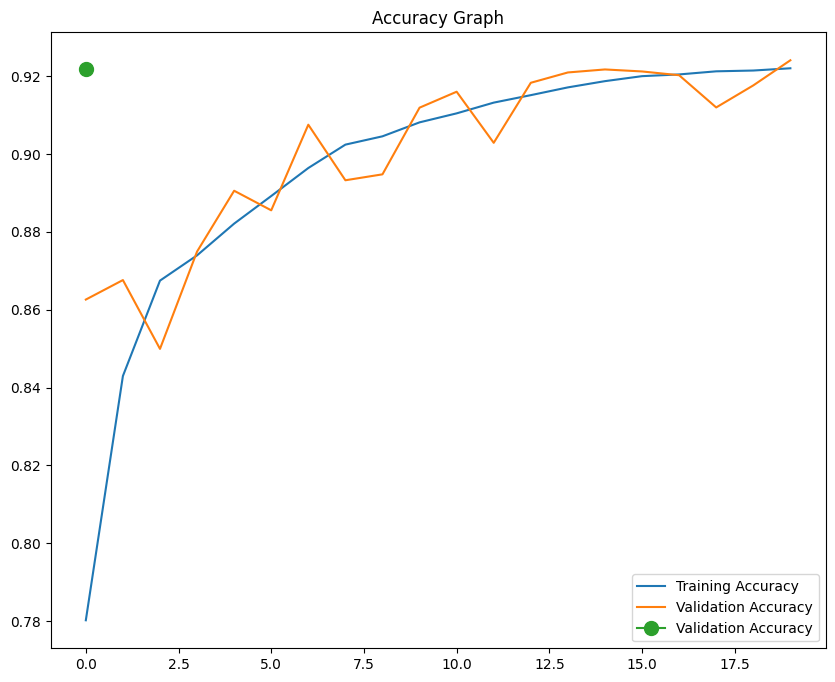

In [190]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o', markersize=10)
plt.legend()
plt.title('Accuracy Graph')
plt.show()

Dari plot diagram di atas, terlihat bahwa akurasi model pada data training dan data validation cenderung sama dan loss model pada data training dan data validation cenderung sama. Hal ini menunjukkan bahwa model yang telah dibangun tidak overfitting dan tidak underfitting.